# Mapping the Gender Pay Gap: Insights for Equity and Action

This notebook investigates the pay gap based on gender across different races and education levels in the US. 

The data comes from [Wages By Education](https://www.kaggle.com/datasets/asaniczka/wages-by-education-in-the-usa-1973-2022), from Kaggle.

In this notebook:

* 1. [Setup](##1_Setup)
* 2. [Visualization](##2_Visualization)
    * 2.1. [By Gender](###2.1_By_Gender)
        * 2.1.1. [Focused DataFrames](####2.1.1_Focused_DataFrames)
        * 2.1.2. [Salary Progression for Men](####2.1.2_Salary_Progression_for_Men)
        * 2.1.3. [Salary Progression for Women](####2.1.3_Salary_Progression_for_Women)
        * 2.1.4. [Pay Gap between Men and Women](####2.1.4_Pay_Gap_between_Men_and_Women)
        * 2.1.5. [Salary Progression Comparison for Men & Women](####2.1.5_Salary_Progression_Comparison_for_Men_&_Women)
    * 2.2. [By Race](###2.2._By_Race)
    * 2.3. [By Race and Gender](###2.3._By_Race_and_Gender)
* 3.XXXX

## 1. Setup

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

In [70]:
df = pd.read_csv('wages_by_education.csv')

In [71]:
df.head() #the columns include average hourly wages

,year,less_than_hs,high_school,some_college,bachelors_degree,advanced_degree,men_less_than_hs,men_high_school,men_some_college,men_bachelors_degree,...,black_women_less_than_hs,black_women_high_school,black_women_some_college,black_women_bachelors_degree,black_women_advanced_degree,hispanic_women_less_than_hs,hispanic_women_high_school,hispanic_women_some_college,hispanic_women_bachelors_degree,hispanic_women_advanced_degree
0,2022,16.52,21.94,24.81,41.60,53.22,17.99,24.08,27.96,49.01,...,13.89,17.83,20.36,29.94,39.41,14.74,18.18,20.64,31.13,40.64
1,2021,16.74,22.28,24.92,41.32,53.45,18.34,24.36,27.96,47.83,...,13.73,18.30,20.18,29.35,40.07,14.97,18.34,21.14,31.25,42.47
2,2020,17.02,22.70,25.44,41.65,53.74,18.76,25.09,28.55,48.15,...,13.66,17.93,20.31,31.38,42.44,14.58,18.50,20.69,31.55,44.15
3,2019,16.11,21.64,24.00,39.61,51.57,17.55,23.99,26.99,45.74,...,13.30,17.18,19.17,30.31,40.42,14.50,17.71,19.69,30.18,42.30
4,2018,15.94,21.50,23.70,38.87,51.03,17.70,23.72,26.61,44.97,...,12.48,16.81,18.57,30.85,39.64,13.47,17.28,19.29,29.47,39.35


In [72]:
df.shape

(50, 61)

We don't see any null values in the data and all columns are of type `float`. No conversion is needed. 

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 61 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   year                             50 non-null     int64  
 1   less_than_hs                     50 non-null     float64
 2   high_school                      50 non-null     float64
 3   some_college                     50 non-null     float64
 4   bachelors_degree                 50 non-null     float64
 5   advanced_degree                  50 non-null     float64
 6   men_less_than_hs                 50 non-null     float64
 7   men_high_school                  50 non-null     float64
 8   men_some_college                 50 non-null     float64
 9   men_bachelors_degree             50 non-null     float64
 10  men_advanced_degree              50 non-null     float64
 11  women_less_than_hs               50 non-null     float64
 12  women_high_school       

Checking the preliminary stats, nothing raises a red flag. The means and standard deviations indicate no outliers in the data.

In [74]:
df.describe().round(2)

,year,less_than_hs,high_school,some_college,bachelors_degree,advanced_degree,men_less_than_hs,men_high_school,men_some_college,men_bachelors_degree,...,black_women_less_than_hs,black_women_high_school,black_women_some_college,black_women_bachelors_degree,black_women_advanced_degree,hispanic_women_less_than_hs,hispanic_women_high_school,hispanic_women_some_college,hispanic_women_bachelors_degree,hispanic_women_advanced_degree
count,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,...,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00
mean,1997.50,15.70,20.88,23.22,34.77,43.90,17.57,23.83,26.33,39.99,...,12.77,16.46,18.96,27.92,36.19,12.81,16.60,18.96,26.49,34.75
std,14.58,1.13,0.74,0.78,3.31,5.31,1.64,1.23,0.90,3.73,...,0.46,0.70,0.73,2.42,3.12,0.75,0.69,0.95,3.22,5.21
min,1973.00,13.95,19.62,22.04,30.04,35.32,15.39,22.11,24.78,35.16,...,11.77,15.53,17.71,23.54,29.34,11.35,15.53,17.04,18.85,20.93
25%,1985.25,14.89,20.39,22.54,31.88,38.76,16.25,22.94,25.80,36.61,...,12.45,15.86,18.41,25.98,33.87,12.27,16.11,18.29,24.24,30.96
50%,1997.50,15.34,20.85,23.18,34.20,44.08,16.90,23.70,26.36,39.48,...,12.78,16.30,18.79,28.52,37.16,12.72,16.46,18.93,27.39,36.08
75%,2009.75,16.50,21.48,23.70,37.12,47.56,18.61,24.31,27.01,42.34,...,13.03,16.99,19.58,30.11,38.31,13.08,16.98,19.64,28.70,38.37
max,2022.00,18.06,22.70,25.44,41.65,53.74,21.18,26.90,28.55,49.01,...,13.89,18.30,20.45,31.38,42.44,14.97,18.50,21.14,31.55,44.15


## 2. Visualization

### 2.1. By Gender 

#### 2.1.1. Focued DataFrames

In order to make for better code, I define new dataframes for *men* and *women*, as well as the salary gap between the two group in `df_men`, `df_women` and `df_diff`, respectively.

Firt, I need to set the index to column `year`, because I want to have time series plot and need to keep this information.

In [75]:
df.set_index('year', inplace = True)

In [76]:
df.head()

,less_than_hs,high_school,some_college,bachelors_degree,advanced_degree,men_less_than_hs,men_high_school,men_some_college,men_bachelors_degree,men_advanced_degree,...,black_women_less_than_hs,black_women_high_school,black_women_some_college,black_women_bachelors_degree,black_women_advanced_degree,hispanic_women_less_than_hs,hispanic_women_high_school,hispanic_women_some_college,hispanic_women_bachelors_degree,hispanic_women_advanced_degree
year,,,,,,,,,,,,,,,,,,,,,
2022,16.52,21.94,24.81,41.60,53.22,17.99,24.08,27.96,49.01,63.51,...,13.89,17.83,20.36,29.94,39.41,14.74,18.18,20.64,31.13,40.64
2021,16.74,22.28,24.92,41.32,53.45,18.34,24.36,27.96,47.83,63.52,...,13.73,18.30,20.18,29.35,40.07,14.97,18.34,21.14,31.25,42.47
2020,17.02,22.70,25.44,41.65,53.74,18.76,25.09,28.55,48.15,62.70,...,13.66,17.93,20.31,31.38,42.44,14.58,18.50,20.69,31.55,44.15
2019,16.11,21.64,24.00,39.61,51.57,17.55,23.99,26.99,45.74,59.93,...,13.30,17.18,19.17,30.31,40.42,14.50,17.71,19.69,30.18,42.30
2018,15.94,21.50,23.70,38.87,51.03,17.70,23.72,26.61,44.97,59.73,...,12.48,16.81,18.57,30.85,39.64,13.47,17.28,19.29,29.47,39.35


Now, defining dataframes for *men* and *women* separately.

In [77]:
df_men = df.loc[:, df.columns.str.contains(r'^men')] 

#we could use `startswith()`, too
#df_men = df.loc[:, df.columns.str.startswith('men')]

A sanity check to make sure I isolated the correct columns from the original dataframe.

In [78]:
df_men.columns.shape

(5,)

In [79]:
columns = df.columns
counter = 0
for item in columns:
    if item.startswith('men'):
        counter+=1
        
counter

5

The number of columns in the new `df_men` equals the number of columns having information about salaries of *men* in the original dataframe. So, we are good. 

In [80]:
df_men.shape

(50, 5)

In [81]:
df_men.head()

,men_less_than_hs,men_high_school,men_some_college,men_bachelors_degree,men_advanced_degree
year,,,,,
2022,17.99,24.08,27.96,49.01,63.51
2021,18.34,24.36,27.96,47.83,63.52
2020,18.76,25.09,28.55,48.15,62.70
2019,17.55,23.99,26.99,45.74,59.93
2018,17.70,23.72,26.61,44.97,59.73


In [82]:
df_men.describe().round(2)

,men_less_than_hs,men_high_school,men_some_college,men_bachelors_degree,men_advanced_degree
count,50.00,50.00,50.00,50.00,50.00
mean,17.57,23.83,26.33,39.99,49.43
std,1.64,1.23,0.90,3.73,7.20
min,15.39,22.11,24.78,35.16,38.72
25%,16.25,22.94,25.80,36.61,43.07
50%,16.90,23.70,26.36,39.48,48.94
75%,18.61,24.31,27.01,42.34,54.51
max,21.18,26.90,28.55,49.01,63.52


Now, we do the same for *women*.

In [83]:
df_women = df.loc[:, df.columns.str.startswith('women')]
df_women.shape

(50, 5)

In [84]:
df_women.head()

,women_less_than_hs,women_high_school,women_some_college,women_bachelors_degree,women_advanced_degree
year,,,,,
2022,14.33,18.93,21.76,34.39,44.34
2021,14.36,19.36,21.97,35.08,44.80
2020,14.40,19.35,22.35,35.41,46.04
2019,13.96,18.48,21.09,33.80,44.22
2018,13.36,18.49,20.91,33.03,43.19


In [85]:
df_women.describe().round(2)

,women_less_than_hs,women_high_school,women_some_college,women_bachelors_degree,women_advanced_degree
count,50.00,50.00,50.00,50.00,50.00
mean,12.85,17.57,19.94,28.93,36.98
std,0.57,0.85,1.28,3.76,5.16
min,11.75,16.45,17.91,22.94,28.47
25%,12.50,16.89,18.78,25.46,32.28
50%,12.81,17.37,19.98,29.42,38.34
75%,13.08,18.32,21.06,31.98,40.88
max,14.40,19.36,22.35,35.41,46.04


Now, I define a new dataframe with the salary gaps between different educational backgrounds, and assign it to `df_diff`. 

In [86]:
df_diff = pd.DataFrame()

df_diff['some_college'] = df['men_some_college'] - df['women_some_college']
df_diff['less_than_hs'] = df['men_less_than_hs'] - df['women_less_than_hs']
df_diff['high_school'] = df['men_high_school'] - df['women_high_school']
df_diff['bachelors_degree'] = df['men_bachelors_degree'] - df['women_bachelors_degree']
df_diff['advanced_degree'] = df['men_advanced_degree'] - df['women_advanced_degree']

#### 2.1.2. Salary Progression for Men

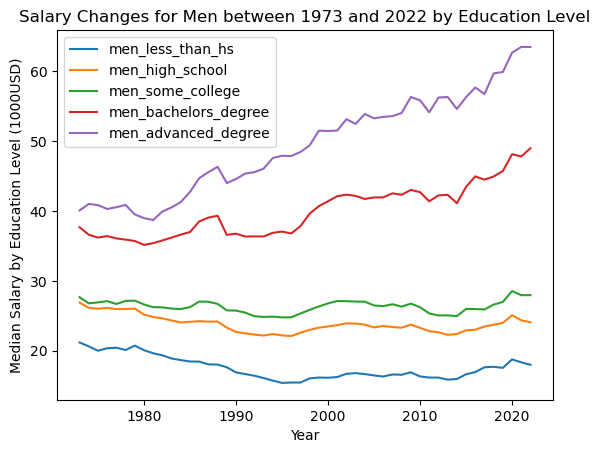

In [87]:
plt.plot(df_men.index, df_men.iloc[:, 0:]) 
plt.xlabel('Year')
plt.ylabel('Median Salary by Education Level (1000USD)')
plt.title('Salary Changes for Men between 1973 and 2022 by Education Level')
plt.legend(df_men.columns)
plt.show()

#### 2.1.3. Salary Progression for Women

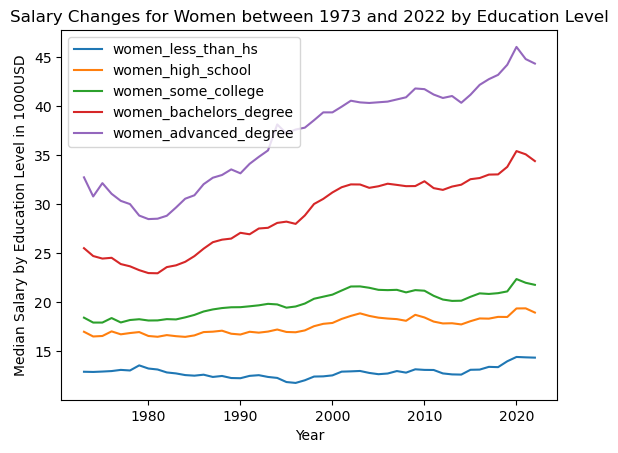

In [88]:
plt.plot(df_women.index, df_women.iloc[:, 0:]) #modify the indexing and fix the indexes here n
plt.xlabel('Year')
plt.ylabel('Median Salary by Education Level in 1000USD')
plt.title('Salary Changes for Women between 1973 and 2022 by Education Level')
plt.legend(df_women.columns)
plt.show()

Both plots show that the salary ranges for less educated men and women has stayed almost the same throughout the years. However, for both groups with bachelor's degree or advanced education, the salary is showing an upward trend during the years. One thing we can look at is this increase ratio in two groups to see if there is a discrepency there as well. 




#### 2.1.4. Pay Gap between Men and Women

While looking at the two dataframes, i.e. `df_men` and `df_women` shows the gap between the two groups, let's quantify this gap below:

In [89]:
df_diff

,some_college,less_than_hs,high_school,bachelors_degree,advanced_degree
year,,,,,
2022,6.20,3.66,5.15,14.62,19.17
2021,5.99,3.98,5.00,12.75,18.72
2020,6.20,4.36,5.74,12.74,16.66
2019,5.90,3.59,5.51,11.94,15.71
2018,5.70,4.34,5.23,11.94,16.54
2017,5.08,4.24,5.16,11.49,14.02
2016,5.09,3.84,4.68,12.32,15.54
2015,5.45,3.54,4.88,10.93,15.16
2014,4.82,3.35,4.68,9.16,14.29


In [90]:
df_diff.describe().round(2)

,some_college,less_than_hs,high_school,bachelors_degree,advanced_degree
count,50.00,50.00,50.00,50.00,50.00
mean,6.39,4.71,6.26,11.06,12.46
std,1.43,1.50,1.64,1.43,2.47
min,4.70,3.09,4.44,8.79,7.36
25%,5.29,3.62,5.15,10.09,10.70
50%,5.84,3.86,5.44,10.86,12.11
75%,7.72,5.94,7.48,12.26,13.92
max,9.26,8.29,9.93,14.62,19.17


In [91]:
print('Maximum hourly pay gap between men and women with less than high school education:', round(df_diff['less_than_hs'].max(), 2) ) 
print('Maximum hourly pay gap between men and women with high school education:', round(df_diff['high_school'].max(), 2) ) 
print('Maximum hourly pay gap between men and women with some college education:', round(df_diff['some_college'].max(), 2) ) 
print('Maximum hourly pay gap between men and women with bachelors degree:', round(df_diff['bachelors_degree'].max(), 2) ) 
print('Maximum hourly pay gap between men and women with advanced degree:', round(df_diff['advanced_degree'].max(), 2) ) 


Maximum hourly pay gap between men and women with less than high school education: 8.29
Maximum hourly pay gap between men and women with high school education: 9.93
Maximum hourly pay gap between men and women with some college education: 9.26
Maximum hourly pay gap between men and women with bachelors degree: 14.62
Maximum hourly pay gap between men and women with advanced degree: 19.17


We see that the gap increases as the level of education increases as well. Let's see this in a plot.

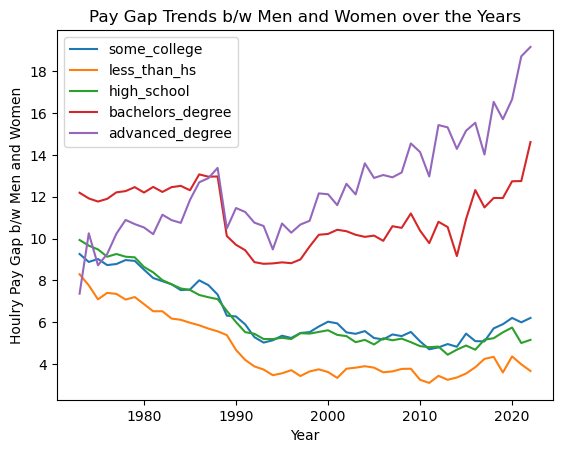

In [92]:
plt.plot(df_diff)
plt.xlabel('Year')
plt.ylabel('Houlry Pay Gap b/w Men and Women')
plt.title('Pay Gap Trends b/w Men and Women over the Years')
plt.legend(df_diff.columns)
plt.show()

#### 2.1.5. Salary Progression Comparison for Men & Women

The goal in this section is to see if the rate of salary increases over the years match for men and women. To do so, we need to calculate the rate by getting the numbers in the first row and the last row in `df_men` and `df_women`, because the first row has the hourly salary rate for 2022 and the last row for 1973. Then, we can calculate the increase rate by subtracting the second number from the first one, dividing it to the second one and multiplying it by 100:

<br>
<br>

<div style="margin-left: 200px">
        
$rate = \frac{\text{Salary}_{2022} - \text{Salary}_{1973}}{\text{Salary}_{1973}} \times 100$

</div>

<br>

To do so systematically and without the need to calculate the rate for each column manually, let's define a function that does it for us in one line:

In [125]:
def calculate_rate(df):
    rate = {}
    df = df.reset_index(drop=True)

    for column in df.columns:
        rate_column = (df.loc[0, column] - df.loc[df.shape[0]-1, column]).round(2)
        rate[column] = str(rate_column)+'%'
    return rate

In [126]:
rate_men = calculate_rate(df_men)
rate_men

{'men_less_than_hs': '-3.19%',
 'men_high_school': '-2.82%',
 'men_some_college': '0.29%',
 'men_bachelors_degree': '11.32%',
 'men_advanced_degree': '23.42%'}

In [127]:
rate_women = calculate_rate(df_women)
rate_women

{'women_less_than_hs': '1.44%',
 'women_high_school': '1.96%',
 'women_some_college': '3.35%',
 'women_bachelors_degree': '8.89%',
 'women_advanced_degree': '11.61%'}

So, overall, we can see that the pay increase rate for men with higher education is bigger than that for women. The difference of increase rate for men and women with advanced degrees is more than twice (23.42-11.61)/23.42 * 100 = 50.34% higher increase rate for men compared to women.

The gap is smaller for bachelor's degree holders and it actually is the opposite for college degrees and lower educational levels, with the salary rate for men actually decreasing between 1973 and 2022. 

# SALARY DURING COVID?

## 2.2. By Race

Let's check the columns one more time:

In [129]:
df.columns

Index(['less_than_hs', 'high_school', 'some_college', 'bachelors_degree',
       'advanced_degree', 'men_less_than_hs', 'men_high_school',
       'men_some_college', 'men_bachelors_degree', 'men_advanced_degree',
       'women_less_than_hs', 'women_high_school', 'women_some_college',
       'women_bachelors_degree', 'women_advanced_degree', 'white_less_than_hs',
       'white_high_school', 'white_some_college', 'white_bachelors_degree',
       'white_advanced_degree', 'black_less_than_hs', 'black_high_school',
       'black_some_college', 'black_bachelors_degree', 'black_advanced_degree',
       'hispanic_less_than_hs', 'hispanic_high_school',
       'hispanic_some_college', 'hispanic_bachelors_degree',
       'hispanic_advanced_degree', 'white_men_less_than_hs',
       'white_men_high_school', 'white_men_some_college',
       'white_men_bachelors_degree', 'white_men_advanced_degree',
       'black_men_less_than_hs', 'black_men_high_school',
       'black_men_some_college', 'black_men_

We have three racial groups: hispanic, white and black. 

In [137]:
df_women_all = df.loc[:, df.columns.str.contains('women')]

In [139]:
df_women_all.columns

Index(['women_less_than_hs', 'women_high_school', 'women_some_college',
       'women_bachelors_degree', 'women_advanced_degree',
       'white_women_less_than_hs', 'white_women_high_school',
       'white_women_some_college', 'white_women_bachelors_degree',
       'white_women_advanced_degree', 'black_women_less_than_hs',
       'black_women_high_school', 'black_women_some_college',
       'black_women_bachelors_degree', 'black_women_advanced_degree',
       'hispanic_women_less_than_hs', 'hispanic_women_high_school',
       'hispanic_women_some_college', 'hispanic_women_bachelors_degree',
       'hispanic_women_advanced_degree'],
      dtype='object')

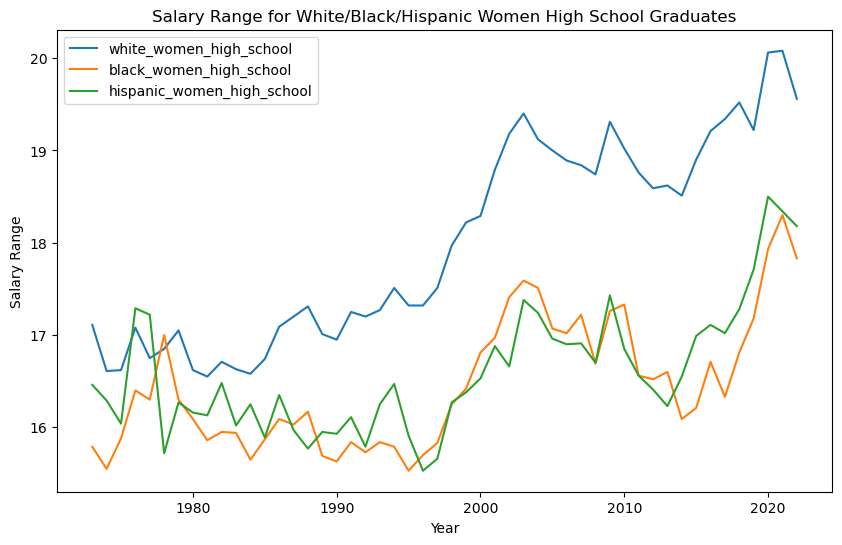

In [162]:
cols_to_plot = df_women_all.columns[
    (df_women_all.columns.str.contains(r'^white.*high*') |
     df_women_all.columns.str.contains(r'^black.*high*') |
    df_women_all.columns.str.contains(r'^hispanic.*high*'))
]

df_women_all.plot(
    y = cols_to_plot,
    figsize=(10, 6)
)

plt.xlabel('Year')
plt.ylabel('Salary Range')
plt.title('Salary Range for White/Black/Hispanic Women High School Graduates')

plt.show()

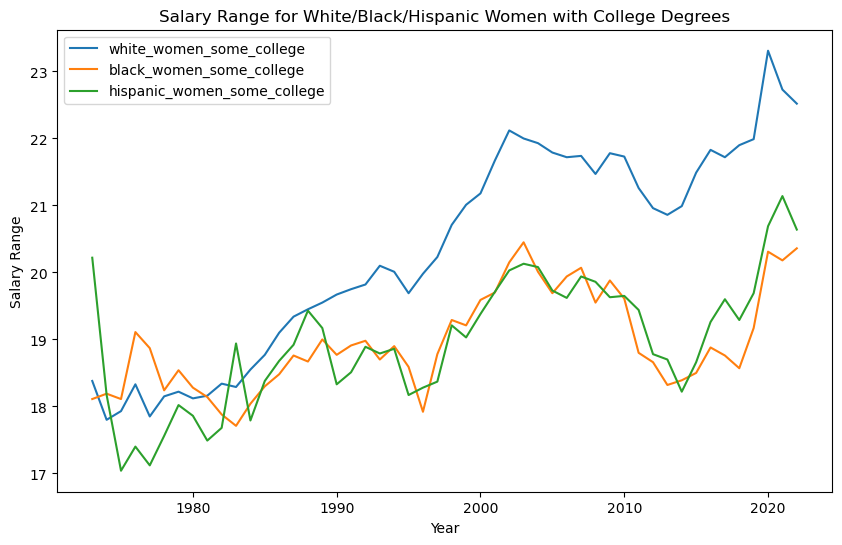

In [161]:
cols_to_plot = df_women_all.columns[
    (df_women_all.columns.str.contains(r'^white.*college*') |
     df_women_all.columns.str.contains(r'^black.*college*') |
    df_women_all.columns.str.contains(r'^hispanic.*college*'))
]

df_women_all.plot(
    y = cols_to_plot,
    figsize=(10, 6)
)

plt.xlabel('Year')
plt.ylabel('Salary Range')
plt.title('Salary Range for White/Black/Hispanic Women with College Degrees')

plt.show()

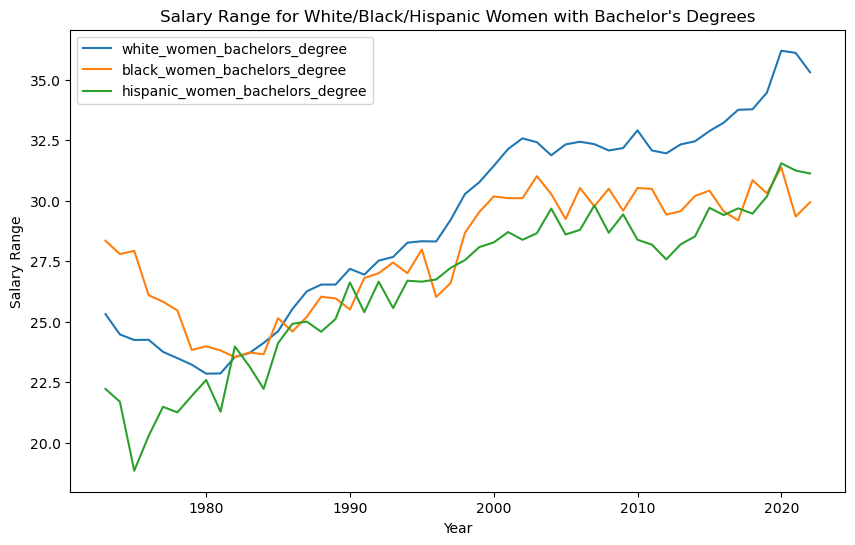

In [163]:
cols_to_plot = df_women_all.columns[
    (df_women_all.columns.str.contains(r'^white.*bachelors*') |
     df_women_all.columns.str.contains(r'^black.*bachelors*') |
    df_women_all.columns.str.contains(r'^hispanic.*bachelors*'))
]

df_women_all.plot(
    y = cols_to_plot,
    figsize=(10, 6)
)

plt.xlabel('Year')
plt.ylabel('Salary Range')
plt.title('Salary Range for White/Black/Hispanic Women with Bachelor\'s Degrees')

plt.show()

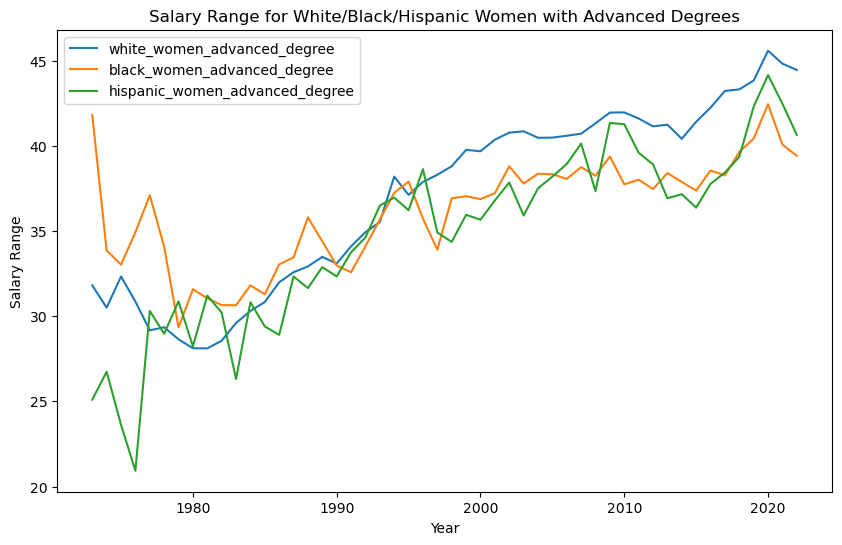

In [158]:
cols_to_plot = df_women_all.columns[
    (df_women_all.columns.str.contains(r'^white.*advanced*') |
     df_women_all.columns.str.contains(r'^black.*advanced*') |
    df_women_all.columns.str.contains(r'^hispanic.*advanced*'))
]

df_women_all.plot(
    y = cols_to_plot,
    figsize=(10, 6)
)

plt.xlabel('Year')
plt.ylabel('Salary Range')
plt.title('Salary Range for White/Black/Hispanic Women with Advanced Degrees')

plt.show()

There is a gap between *white* women and the other two racial groups, but the gap seems to decrease as the level of education increases. Let's quantify this, though. 

In [164]:
df_women_all.head()

,women_less_than_hs,women_high_school,women_some_college,women_bachelors_degree,women_advanced_degree,white_women_less_than_hs,white_women_high_school,white_women_some_college,white_women_bachelors_degree,white_women_advanced_degree,black_women_less_than_hs,black_women_high_school,black_women_some_college,black_women_bachelors_degree,black_women_advanced_degree,hispanic_women_less_than_hs,hispanic_women_high_school,hispanic_women_some_college,hispanic_women_bachelors_degree,hispanic_women_advanced_degree
year,,,,,,,,,,,,,,,,,,,,
2022,14.33,18.93,21.76,34.39,44.34,13.84,19.56,22.52,35.31,44.45,13.89,17.83,20.36,29.94,39.41,14.74,18.18,20.64,31.13,40.64
2021,14.36,19.36,21.97,35.08,44.80,13.77,20.08,22.73,36.11,44.82,13.73,18.30,20.18,29.35,40.07,14.97,18.34,21.14,31.25,42.47
2020,14.40,19.35,22.35,35.41,46.04,14.20,20.06,23.31,36.20,45.58,13.66,17.93,20.31,31.38,42.44,14.58,18.50,20.69,31.55,44.15
2019,13.96,18.48,21.09,33.80,44.22,13.44,19.22,21.99,34.47,43.83,13.30,17.18,19.17,30.31,40.42,14.50,17.71,19.69,30.18,42.30
2018,13.36,18.49,20.91,33.03,43.19,13.45,19.52,21.90,33.78,43.31,12.48,16.81,18.57,30.85,39.64,13.47,17.28,19.29,29.47,39.35


In [170]:
df_women_all_stats = df_women_all.describe().round(2)

In [171]:
df_women_all_stats

,women_less_than_hs,women_high_school,women_some_college,women_bachelors_degree,women_advanced_degree,white_women_less_than_hs,white_women_high_school,white_women_some_college,white_women_bachelors_degree,white_women_advanced_degree,black_women_less_than_hs,black_women_high_school,black_women_some_college,black_women_bachelors_degree,black_women_advanced_degree,hispanic_women_less_than_hs,hispanic_women_high_school,hispanic_women_some_college,hispanic_women_bachelors_degree,hispanic_women_advanced_degree
count,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00
mean,12.85,17.57,19.94,28.93,36.98,12.80,18.00,20.32,29.18,36.98,12.77,16.46,18.96,27.92,36.19,12.81,16.60,18.96,26.49,34.75
std,0.57,0.85,1.28,3.76,5.16,0.49,1.10,1.56,4.05,5.35,0.46,0.70,0.73,2.42,3.12,0.75,0.69,0.95,3.22,5.21
min,11.75,16.45,17.91,22.94,28.47,11.73,16.55,17.80,22.86,28.11,11.77,15.53,17.71,23.54,29.34,11.35,15.53,17.04,18.85,20.93
25%,12.50,16.89,18.78,25.46,32.28,12.48,17.06,18.85,25.37,32.07,12.45,15.86,18.41,25.98,33.87,12.27,16.11,18.29,24.24,30.96
50%,12.81,17.37,19.98,29.42,38.34,12.79,17.74,20.47,29.74,38.55,12.78,16.30,18.79,28.52,37.16,12.72,16.46,18.93,27.39,36.08
75%,13.08,18.32,21.06,31.98,40.88,13.02,18.98,21.73,32.40,41.22,13.03,16.99,19.58,30.11,38.31,13.08,16.98,19.64,28.70,38.37
max,14.40,19.36,22.35,35.41,46.04,14.20,20.08,23.31,36.20,45.58,13.89,18.30,20.45,31.38,42.44,14.97,18.50,21.14,31.55,44.15


# HERE HERE HERE

In [ ]:
df_women_all['diff_'

In [175]:
df_women_all.loc[: , df_women_all.columns.str.contains('hispanic')]

,hispanic_women_less_than_hs,hispanic_women_high_school,hispanic_women_some_college,hispanic_women_bachelors_degree,hispanic_women_advanced_degree
year,,,,,
2022,14.74,18.18,20.64,31.13,40.64
2021,14.97,18.34,21.14,31.25,42.47
2020,14.58,18.50,20.69,31.55,44.15
2019,14.50,17.71,19.69,30.18,42.30
2018,13.47,17.28,19.29,29.47,39.35
2017,13.36,17.02,19.60,29.69,38.43
2016,13.40,17.11,19.26,29.41,37.77
2015,13.42,16.99,18.66,29.71,36.37
2014,12.61,16.55,18.22,28.53,37.16


In [184]:
white_cols = df_women_all.loc[:, df_women_all.columns.str.contains('white')]
black_cols = df_women_all.loc[:, df_women_all.columns.str.contains('black')]


In [187]:
white_cols.values - black_cols.values


array([[ -0.05,   1.73,   2.16,   5.37,   5.04],
       [  0.04,   1.78,   2.55,   6.76,   4.75],
       [  0.54,   2.13,   3.  ,   4.82,   3.14],
       [  0.14,   2.04,   2.82,   4.16,   3.41],
       [  0.97,   2.71,   3.33,   2.93,   3.67],
       [  0.47,   3.01,   2.96,   4.57,   4.96],
       [  0.56,   2.5 ,   2.95,   3.67,   3.69],
       [ -0.11,   2.69,   2.99,   2.46,   4.04],
       [  0.07,   2.42,   2.6 ,   2.26,   2.53],
       [  0.06,   2.02,   2.54,   2.76,   2.84],
       [  0.75,   2.07,   2.3 ,   2.53,   3.68],
       [ -0.49,   2.2 ,   2.46,   1.59,   3.59],
       [ -0.77,   1.69,   2.12,   2.38,   4.22],
       [ -0.31,   2.05,   1.9 ,   2.59,   2.58],
       [ -0.2 ,   2.05,   1.92,   1.58,   3.08],
       [ -0.04,   1.62,   1.67,   2.57,   1.96],
       [ -0.84,   1.87,   1.78,   1.91,   2.53],
       [ -0.36,   1.93,   2.1 ,   3.08,   2.15],
       [ -0.07,   1.61,   1.92,   1.6 ,   2.11],
       [ -0.29,   1.81,   1.55,   1.4 ,   3.07],
       [  0.08,   1.

In [189]:
diff = white_cols.copy()
#diff.loc[:, :] = white_cols.values - black_cols.values

diff.columns = [f'diff_{col}' for col in white_cols.columns]

In [190]:
diff

,diff_white_women_less_than_hs,diff_white_women_high_school,diff_white_women_some_college,diff_white_women_bachelors_degree,diff_white_women_advanced_degree
year,,,,,
2022,13.84,19.56,22.52,35.31,44.45
2021,13.77,20.08,22.73,36.11,44.82
2020,14.20,20.06,23.31,36.20,45.58
2019,13.44,19.22,21.99,34.47,43.83
2018,13.45,19.52,21.90,33.78,43.31
2017,13.46,19.34,21.72,33.76,43.22
2016,12.98,19.21,21.83,33.23,42.24
2015,12.68,18.90,21.49,32.88,41.41
2014,12.54,18.51,20.99,32.46,40.41


In [183]:
df_women_all[df_women_all.columns.str.contains('white_women_less')] - df_women_all[df_women_all.columns.str.contains('black_women_less')]


ValueError: Item wrong length 20 instead of 50.

In [ ]:
def calculate_diff_by_race_education(df):
    
    for column in df:
        
        if column.str.contains(r'*less*'):
            df['diff_less_white_black'] = df.loc[df.columns.str.contains('white')] - df.loc[df.columns.str.contains('black')]
    
    
      (df_women_all.columns.str.contains(r'^white.*advanced*') |
     df_women_all.columns.str.contains(r'^black.*advanced*') |
    df_women_all.columns.str.contains(r'^hispanic.*advanced*'))

# By education

# By Race + Education